In [2]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 32.3 MB/s 
     |████████████████████████████████| 511.8 MB 8.2 kB/s 
     |████████████████████████████████| 5.8 MB 55.8 MB/s 
     |████████████████████████████████| 1.6 MB 59.5 MB/s 
     |████████████████████████████████| 438 kB 69.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Unins

In [24]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import tensorflow_text as text
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as snb

In [25]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [26]:
df = pd.read_csv('/content/gdrive/MyDrive/data.csv', engine='python', encoding='latin-1', header=None, on_bad_lines='skip')

In [27]:
df[0] = df[0].replace([4], 1)

In [28]:
df.drop(df.index[0:790000], inplace=True)
df.drop(df.index[10000:799999], inplace=True)

In [29]:
df

,0,1,2,3,4,5
790000,0,2325540224,Thu Jun 25 05:38:16 PDT 2009,NO_QUERY,Kain292,Virpi's last day. Busy as tits.
790001,0,2325540629,Thu Jun 25 05:38:19 PDT 2009,NO_QUERY,dean_b,@SherilynMoon unfortunate then that I have no ...
790002,0,2325540730,Thu Jun 25 05:38:20 PDT 2009,NO_QUERY,volleygalore,just dropped off the car to get the brakes loo...
790003,0,2325540825,Thu Jun 25 05:38:20 PDT 2009,NO_QUERY,shOrtyyxx,Colin Kelly on Clyde1 Should get One Republic ...
790004,0,2325540910,Thu Jun 25 05:38:21 PDT 2009,NO_QUERY,DLPsYks,just a little upset i had a chance to take 4 o...
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [30]:
# headers = ['target', 'id', 'date', 'flag', 'user', 'text']
# df.to_csv('data2.csv', header=headers, index=False)

In [31]:
# df2 = pd.read_csv('data2.csv', engine='python', encoding='latin-1', on_bad_lines='skip')

In [32]:
# df2.head()

In [33]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [34]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [35]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df[5], df[0])

In [37]:
y_test

797647     0
792604     0
792584     0
1593753    1
1596784    1
          ..
1591251    1
1599249    1
790258     0
1593788    1
792931     0
Name: 0, Length: 5001, dtype: int64

In [38]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [39]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
469/469 [==============================] - 154s 312ms/step - loss: 0.6627 - accuracy: 0.5977 - precision: 0.5971 - recall: 0.6155
Epoch 2/5
469/469 [==============================] - 150s 321ms/step - loss: 0.6193 - accuracy: 0.6535 - precision: 0.6475 - recall: 0.6831
Epoch 3/5
469/469 [==============================] - 151s 322ms/step - loss: 0.5983 - accuracy: 0.6778 - precision: 0.6706 - recall: 0.7066
Epoch 4/5
469/469 [==============================] - 151s 322ms/step - loss: 0.5821 - accuracy: 0.6957 - precision: 0.6893 - recall: 0.7194
Epoch 5/5
469/469 [==============================] - 151s 322ms/step - loss: 0.5730 - accuracy: 0.6990 - precision: 0.6945 - recall: 0.7169


In [40]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 50s 315ms/step - loss: 0.5657 - accuracy: 0.7137 - precision: 0.7302 - recall: 0.6612


[0.5656875967979431, 0.7136572599411011, 0.730215847492218, 0.6612377762794495]

In [41]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

157/157 [==============================] - 50s 315ms/step


In [42]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, ..., 0, 1, 0])

In [43]:
cm = confusion_matrix(y_test, y_predicted)

Text(33.0, 0.5, 'Truth')

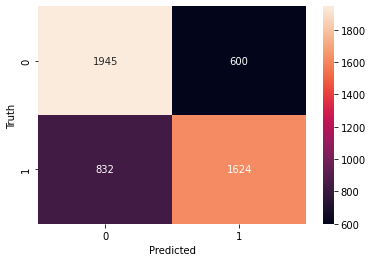

In [44]:
snb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')